In [1]:
# Universidade Federal de Pernambuco
# Disciplina: Macroeconomia 2
# Professor: Marcelo Silva
# Aluno: Paulo Francisco da Silva Junior

In [2]:
# Importações
import numpy as np
import matplotlib.pyplot as plt

Utilizando o código do Matlab Sim_Mundell_Flemming_exemplo.m ou do R Sim_Mundell_Flemming_exemplo.R, disponível na pasta do curso, e considerando a economia da questão 4, realize as seguintes simulações:

Economia da questão 4:

C = 200 + 0.5\*Yd

I = 400 + 0.2\*Y − 2000\*r

X = 200 + 0.01\*Yf + 100\*ε

IM = 0.1\*Y − 50\*ε

M = Y − 0.02\*r

G = 100; T = 100; Yf = 10000;

Em que: C é o consumo agregado, Y é a renda, Yd é a renda disponível, I é o investimento privado, r é a taxa de juros, T é a arrecadação tributária, G é o gasto do governo, X representa as exportações, IM é o total das importações, ε é a taxa de câmbio real, M é a demanda por moeda, Yf é a renda externa.

Supondo que a taxa de juros seja igual a 5% e que ε = 1.

i) Simule a economia para o estado estacionário (em equilíbrio) com 50 períodos. Plote os gráficos.

In [3]:
# Tempo de simulação
n=50

In [4]:
# Inicializando variáveis exógenas
yf = 10000*np.ones((n,1))
r = 0.05*np.ones((n,1))
T = 100*np.ones((n,1))
G = T
rf = 0.05*np.ones((n,1))

In [5]:
# Função para simplificar nossa vida
def simulacao(n, yf,r,T,G,rf):
  # Inicializando variáveis endógenas (steady-state)
  Y = np.zeros((n,1))
  C = np.zeros((n,1))
  I = np.zeros((n,1))
  X = np.zeros((n,1))
  IM = np.zeros((n,1))
  M = np.zeros((n,1))
  e = np.zeros((n,1)) # 1 por definição
  NX = X - IM

  # Inicializando economia
  for i in range(0,n,1):
    yf[i] = yf[i]
    e[i] = (1+rf[i])/(1+r[i])
    r[i] = r[i]
    Y[i] = (1/(1-0.5-0.2+0.1))*(200 - 0.5*T[i] + 400 - 2000*r[i] + G[i] + 200 + 0.01*yf[i] + 100*e[i] + 50*e[i])
    C[i] = 200 + 0.5*(Y[i]-T[i])
    I[i] = 400 + 0.2*Y[i]-2000*r[i]
    X[i] = 200 + 0.01*yf[i] + 100*e[i]
    IM[i] = 0.1*Y[i] - 50*e[i]
    M[i] = Y[i] - 0.02*r[i]
    NX[i] = X[i]-IM[i]

  # Normalizando tempo (shape)
  time = np.arange(1,n+1,1)

  # Configuração gráfica
  %matplotlib inline 
  %pylab inline
  plt.style.use('ggplot') 
  plt.rcParams['figure.figsize'] = [20,10] 
  plt.rcParams['font.size'] = 24
  #plt.rcParams['font.family']='serif'
  plt.rcParams['font.serif']='Ubuntu'
  plt.rcParams['font.monospace']='Ubuntu Mono'
  plt.rcParams['font.size']=12
  plt.rcParams['axes.labelsize']=14
  plt.rcParams['axes.labelweight']='bold'
  plt.rcParams['axes.titlesize']=15
  plt.rcParams['xtick.labelsize']=10
  plt.rcParams['ytick.labelsize']=10
  plt.rcParams['legend.fontsize']=12
  plt.rcParams['figure.titlesize']=15
  plt.rcParams['figure.subplot.left'] = 0.125
  plt.rcParams['figure.subplot.bottom'] = 0.125
  plt.rcParams['figure.subplot.right'] = 0.9
  plt.rcParams['figure.subplot.top'] = 0.9
  plt.rcParams['figure.subplot.wspace'] = 0.2
  plt.rcParams['figure.subplot.hspace'] = 0.35

  # Plotando gráfico
  plt.subplot(4,3,1)
  plt.plot(time, Y)
  plt.title('Produto')
  plt.xlabel='Tempo'

  plt.subplot(4,3,2)
  plt.plot(time, C)
  plt.title('Consumo')
  plt.xlabel='Tempo'

  plt.subplot(4,3,3)
  plt.plot(time, I)
  plt.title('Investimento')
  plt.xlabel='Tempo'

  plt.subplot(4,3,4)
  plt.plot(time, X)
  plt.title('Exportacoes')
  plt.xlabel='Tempo'

  plt.subplot(4,3,5)
  plt.plot(time, IM)
  plt.title('Importacoes')
  plt.xlabel='Tempo'

  plt.subplot(4,3,6)
  plt.plot(time, e)
  plt.title('Taxa de Cambio')
  plt.xlabel='Tempo'

  plt.subplot(4,3,7)
  plt.plot(time, M)
  plt.title('Moeda')
  plt.xlabel='Tempo'

  plt.subplot(4,3,8)
  plt.plot(time, r)
  plt.title('Taxa de juros')
  plt.xlabel='Tempo'

  plt.subplot(4,3,9)
  plt.plot(time, yf)
  plt.title('PIB Mundial')
  plt.xlabel='Tempo'

  plt.subplot(4,3,10)
  plt.plot(time, NX)
  plt.title('Exportações Líquida')
  plt.xlabel='Tempo'

  plt.show()

Populating the interactive namespace from numpy and matplotlib


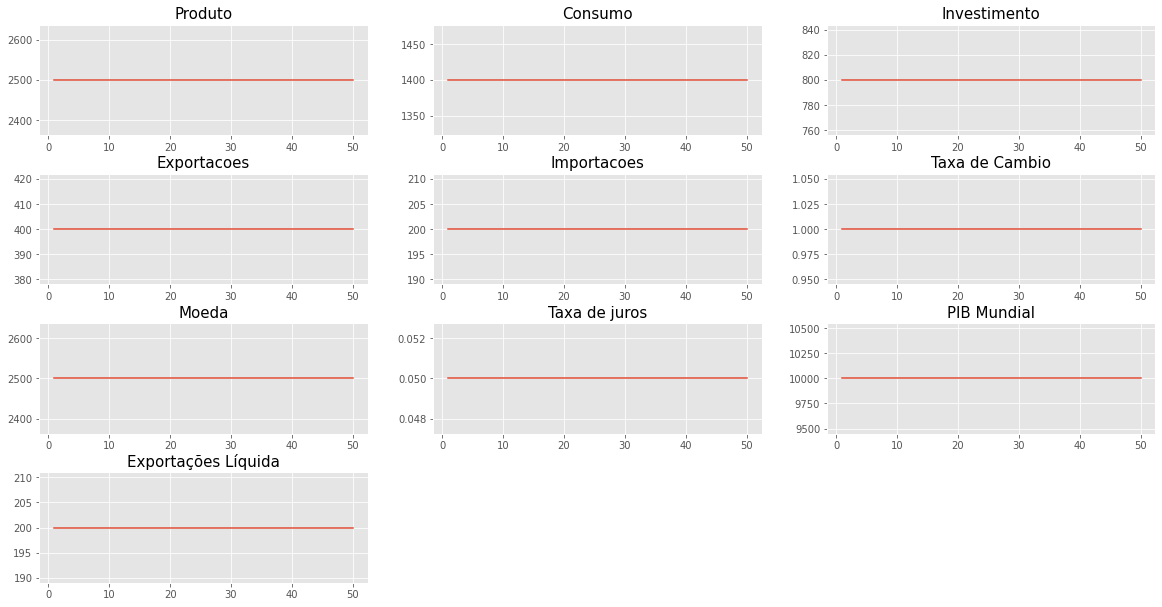

In [6]:
simulacao(n,yf,r,T,G,rf)

ii) Assuma que tudo o mais constante, o governo resolve implementar uma política fiscal expansionista
a partir do 20 período, com ∆g = 20%. Considere o caso onde a política dura por 4 períodos, após
o qual a política fiscal expansionista é retirada. Quais os efeitos sobre as variáveis domésticas?
Plote os gráficos.

In [7]:
# Assumindo aumento de G em 20% em 4 periodos
G[20:24] *= 1.2 # Execute apenas uma vez, caso contrário efeito será acumulativo

Populating the interactive namespace from numpy and matplotlib


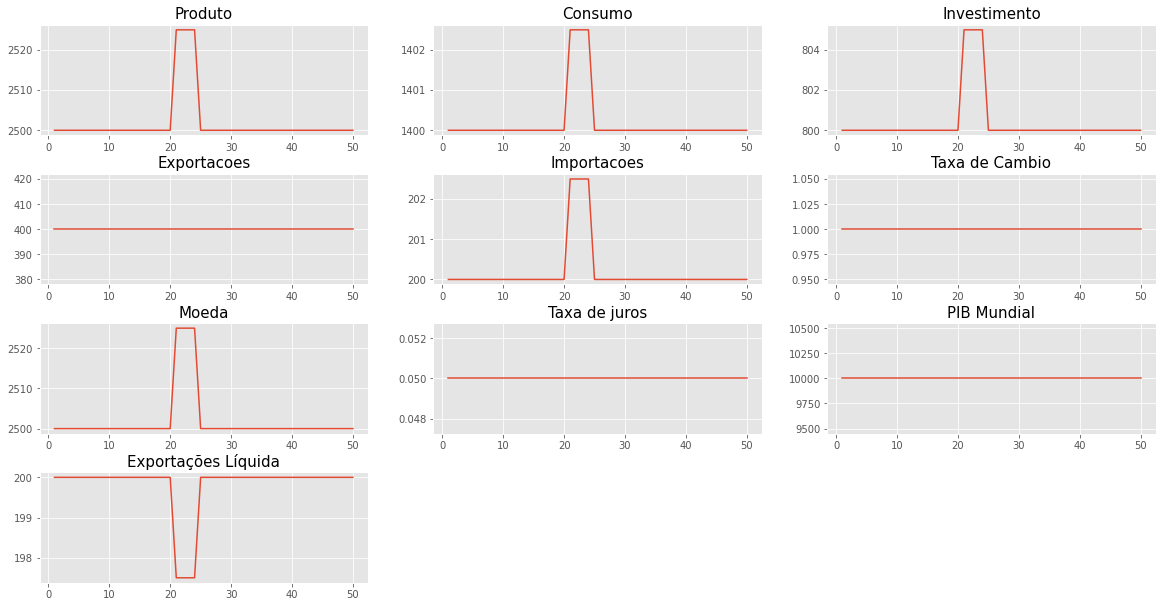

In [8]:
# Simulando novo caso
simulacao(n,yf,r,T,G,rf)

R: Produto interno sobe, dado aumento dos gastos; consumo, investimento, moeda e importações sobe via crescimento do PIB. Exportações líquidas cai via aumento das importações.

iii) Considere a economia no equilíbrio de longo prazo, e assuma agora que a partir do 20 período há
uma aumento no PIB mundial de 50%. Quais os efeitos sobre as variáveis domésticas? Plote os
gráficos.

In [9]:
# Normalizando G da ultima simulação :)
T = 100*np.ones((n,1))
G = T

In [10]:
# Assumindo aumento de yf em 50% de 20T em diante
yf[20:] *=1.5 # Execute apenas uma vez, caso contrário efeito será acumulativo

Populating the interactive namespace from numpy and matplotlib


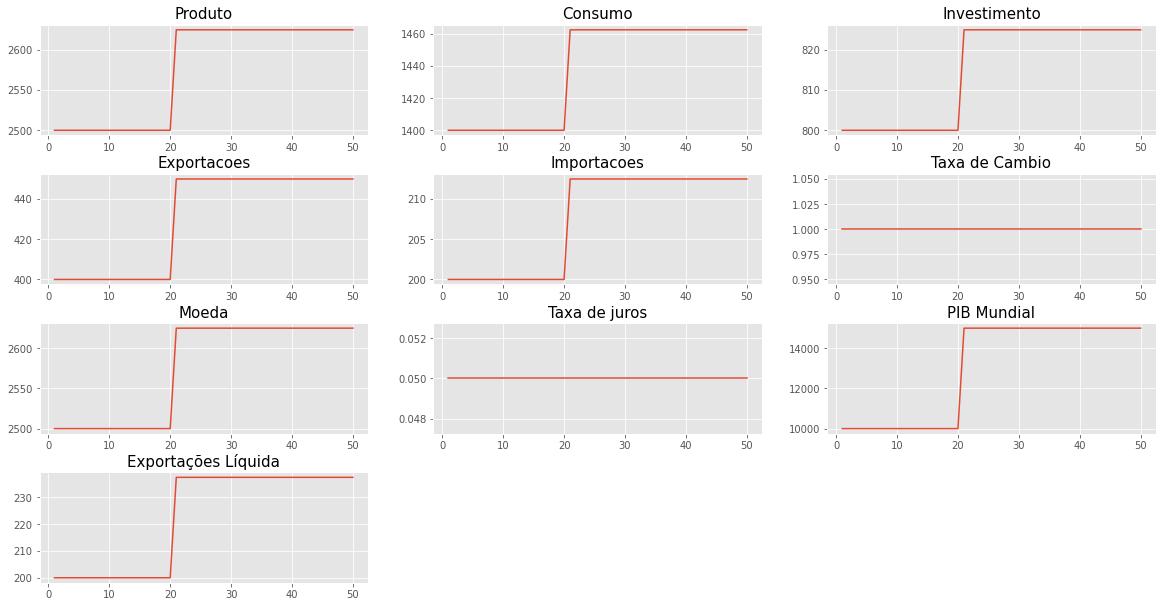

In [11]:
# Simulando novo caso
simulacao(n,yf,r,T,G,rf)

R: Dado o aumento do PIB mundial há um aumento no PIB interno e da exportações; Com o aumento do produto interno haverá aumento do consumo, investimento, moeda e importações; Embora importações e exportações subam, as exportações líquidas crescem.

iv) Crie uma variável exportações líquidas, NX = X − IM, e simule os efeitos de uma política de aumento nas taxas de juros, de r = 5% para r' = 10%, com um aumento nos gastos do governo em
20%. Quais os efeitos desta combinação de política sobre o PIB, C, I e NX? Plote os gráficos.

In [12]:
# Re-Inicializando variáveis exógenas
yf = 10000*np.ones((n,1))
r = 0.05*np.ones((n,1))
T = 100*np.ones((n,1))
G = T
rf = 0.05*np.ones((n,1))

In [13]:
# Consideremos choque permanente a partir do periodo 20, e tudo mais constante

# Aumento de 20% em G
G[20:] *= 1.2

# Aumento de r para 10%
r[20:] = 0.1

Populating the interactive namespace from numpy and matplotlib


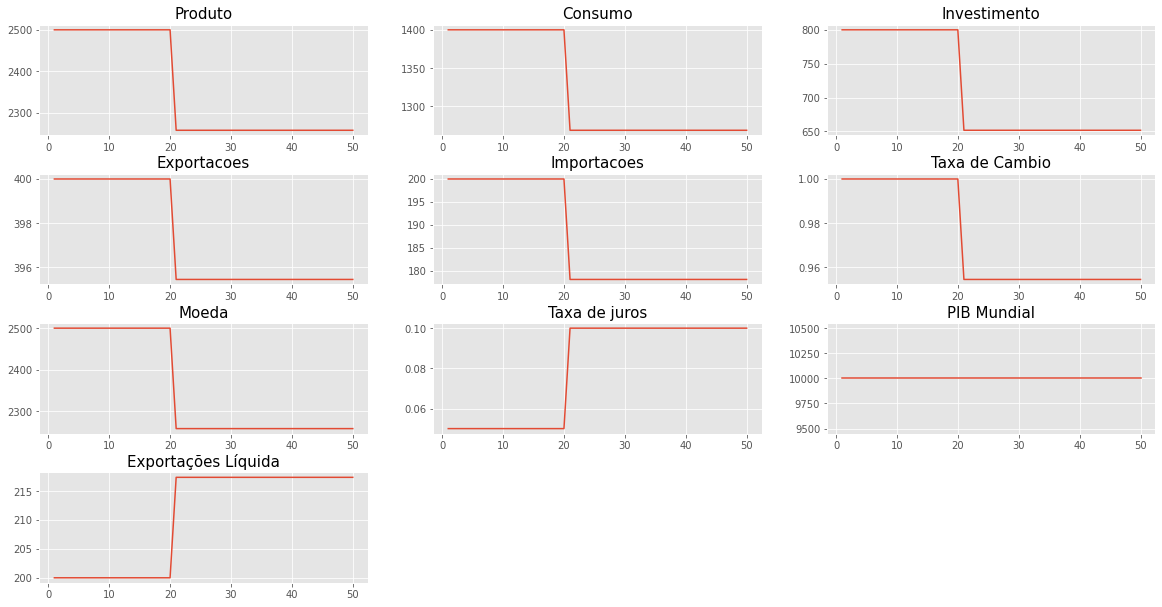

In [14]:
# Simulando novo caso
simulacao(n,yf,r,T,G,rf)

R: Dado os parametros dessa economia, a combinação dessa políticas levará a uma queda no produto interno, investimento, consumo, importações, taxa de cambio, aumento de exportações e exportações líquidas.